# Time series

see https://pythondata.com/forecasting-time-series-data-with-prophet-part-2/

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
#from pivottablejs import pivot_ui
import sys
import warnings

warnings.filterwarnings("ignore")
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [2]:
from fbprophet import Prophet

In [3]:
from sqlalchemy import create_engine
from decouple import config

In [4]:
#val = !cat '/home/jovyan/.env'
#db=val[0].split('=')[1];
db=config('DATABASE_URL')

In [5]:
engine = create_engine(db)

In [6]:
sql = '''
SELECT        
--    top 10
	t.Date as ds,
	SUM(t.NetSalesAmt) AS y

FROM            
	BRS_TransactionDW AS t
    
	INNER JOIN BRS_Item AS i 
	ON t.Item = i.Item 

	INNER JOIN BRS_Customer AS c 
	ON t.Shipto = c.ShipTo 
    
    INNER JOIN BRS_SalesDay AS d
    ON t.Date = d.SalesDate

WHERE         
	(i.SalesCategory = 'MERCH') AND 
--    (c.CustGrpWrk = 'Dental Corp') AND
	(t.CalMonth BETWEEN 201701 and 201812) AND
	(1=1)

GROUP BY 
	t.Date

'''

In [7]:
#sql = "select  distinct CustGrpWrk from BRS_Customer where CustGrpWrk like 'Den%' " 

In [8]:
%time df = pd.read_sql_query(sql, engine);

CPU times: user 14.3 ms, sys: 2.44 ms, total: 16.7 ms
Wall time: 2.86 s


In [9]:
df.head

<bound method NDFrame.head of             ds           y
0   2017-01-16   927733.89
1   2017-01-17  1039410.80
2   2017-01-31  1054247.53
3   2017-02-01  1149991.11
4   2017-02-02   906073.24
..         ...         ...
499 2018-11-28  1112816.27
500 2018-12-05  1217635.09
501 2018-12-07   862499.92
502 2018-12-14   740037.01
503 2018-12-21   423642.92

[504 rows x 2 columns]>

In [10]:
df.columns.tolist()

['ds', 'y']

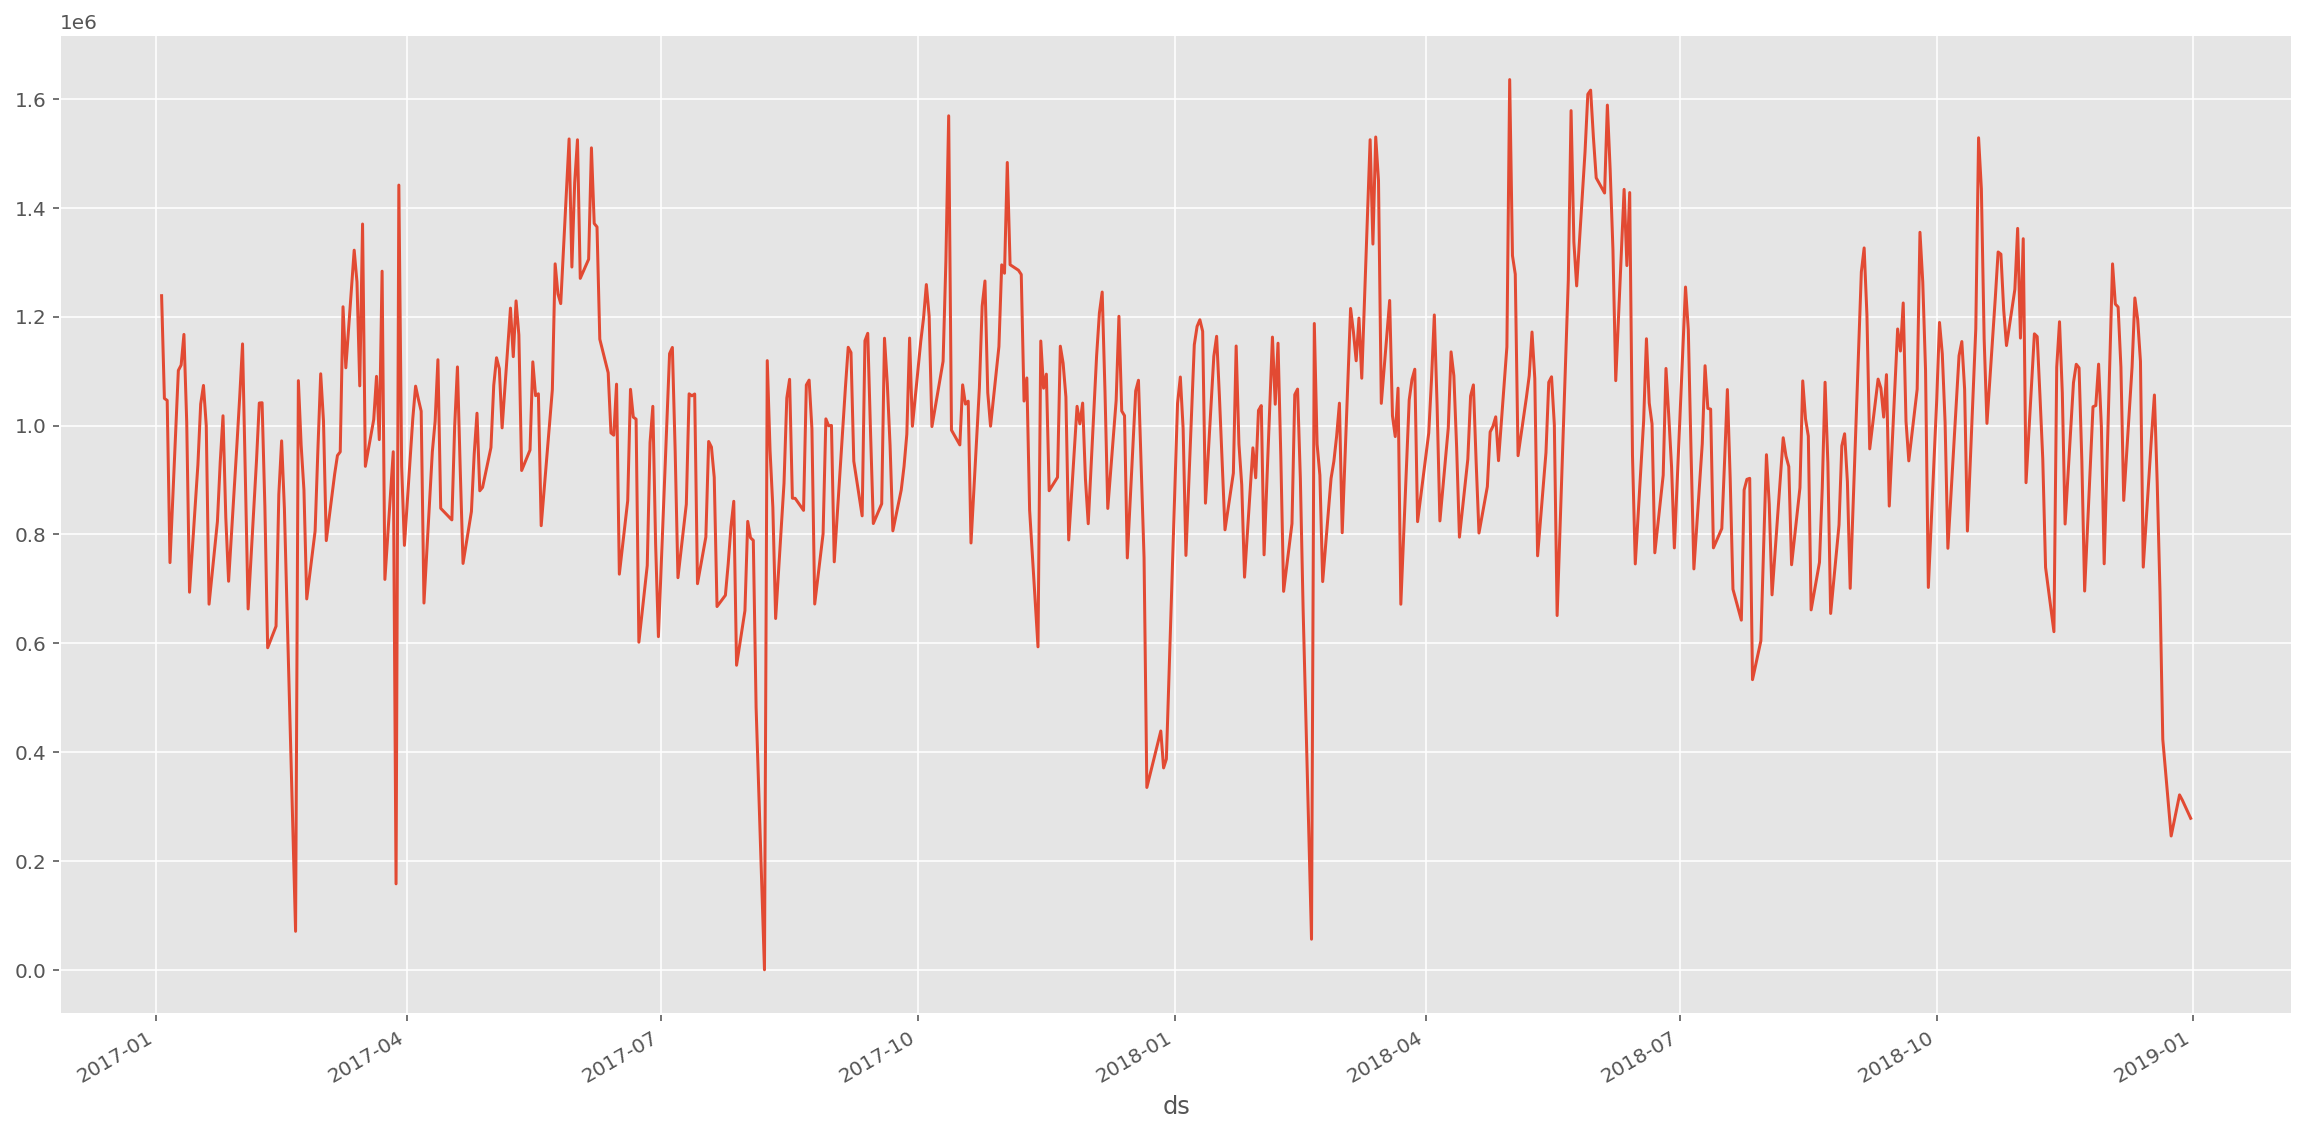

In [11]:
df.set_index('ds').y.plot()


In [12]:
m = Prophet(yearly_seasonality=True);
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 1 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=365)
future.describe()

ds
count                   869
unique                  869
top     2017-10-30 00:00:00
freq                      1
first   2017-01-03 00:00:00
last    2019-12-31 00:00:00

In [14]:
forecast = m.predict(future)

FileNotFoundError: [Errno 2] No such file or directory: '../data/forecast.png'

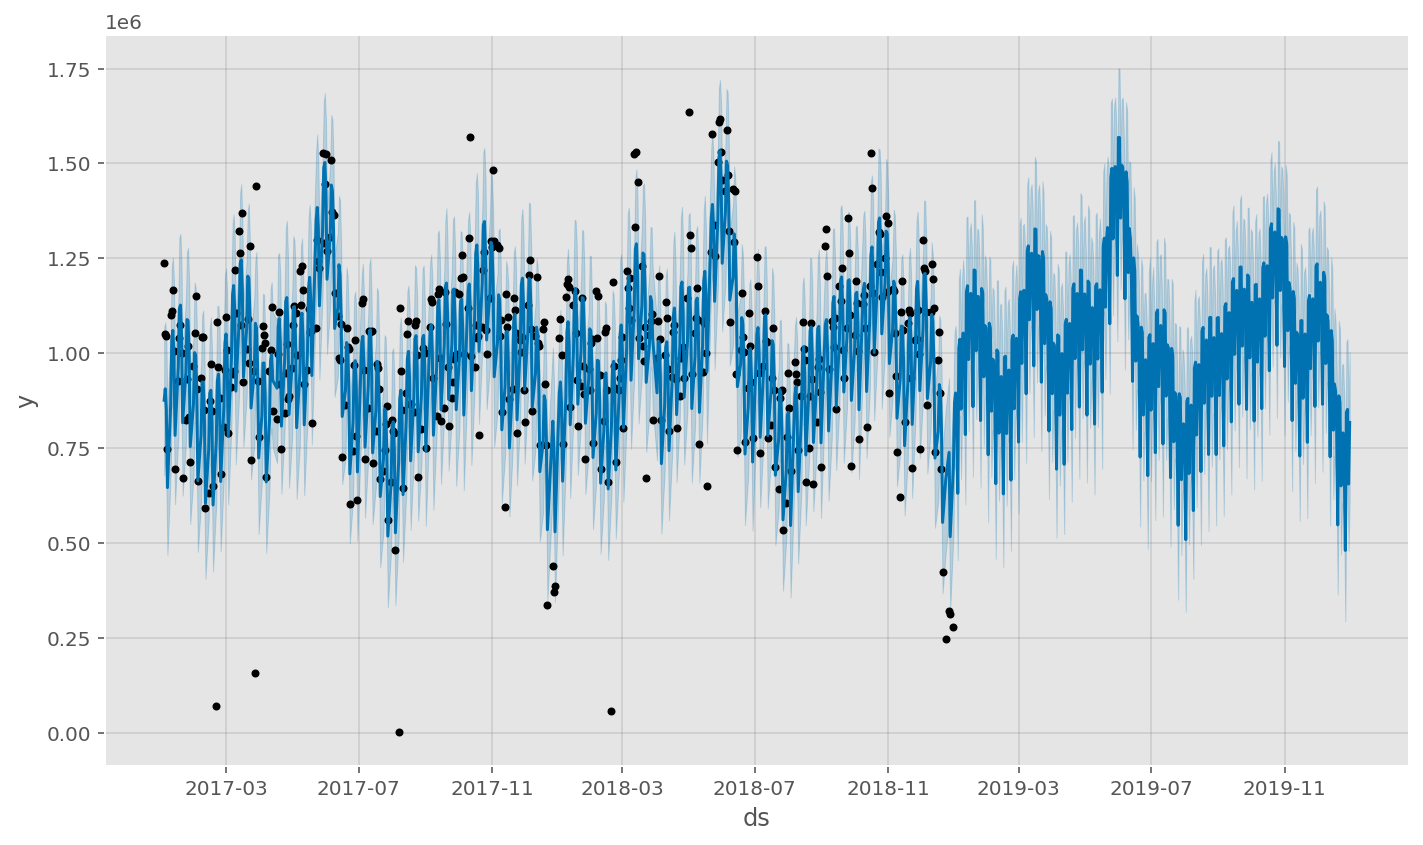

In [15]:
fig1 = m.plot(forecast).savefig('../data/forecast.png');

In [ ]:
fig2 = m.plot_components(forecast).savefig('../data/comp.png');

In [16]:
from fbprophet.plot import plot_plotly
import plotly.offline as py


In [18]:
py.init_notebook_mode(connected=True)
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)